## SPRING M5 T02

# Parte 1

In [109]:
#cargamos librerias

import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
#cargamos datos
datos=pd.read_csv("housing data.csv")

In [110]:
# Del archivo "housing data description.txt" cogemos los valores de las columnas para añadir los nombres 
# de las columnas al dataframe

columnas=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PRATIO","B","LSTAT","MEDV"]


In [111]:
datos.columns=columnas

Le añadimos los nombres de las columnas y copiamos el significado de cada columna.
    1. CRIM      per capita crime rate by town  
    2. ZN        proportion of residential land zoned for lots over  
                 25,000 sq.ft.  
    3. INDUS     proportion of non-retail business acres per town   
    4. CHAS      Charles River dummy variable (= 1 if tract bounds    
                 river; 0 otherwise)   
    5. NOX       nitric oxides concentration (parts per 10 million)   
    6. RM        average number of rooms per dwelling   
    7. AGE       proportion of owner-occupied units built prior to 1940  
    8. DIS       weighted distances to five Boston employment centres    
    9. RAD       index of accessibility to radial highways     
    10. TAX      full-value property-tax rate per $10,000    
    11. PTRATIO  pupil-teacher ratio by town  
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town    
    13. LSTAT    % lower status of the population     
    14. MEDV     Median value of owner-occupied homes in $1000's    

In [112]:
datos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [113]:
datos.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [114]:
datos.shape


(505, 14)

In [115]:
#antes de fraccionar los datos en train y test miramos si hay valores NULL
datos.isnull().sum()

CRIM      0
ZN        0
INDUS     0
CHAS      0
NOX       0
RM        0
AGE       0
DIS       0
RAD       0
TAX       0
PRATIO    0
B         0
LSTAT     0
MEDV      0
dtype: int64

Hacemos una foto rápida de los datos globales antes de separarlos.Primero con un heatmap para ver posibles relaciones y otra con los histogramas para hacernos una primera idea de los datos.

<AxesSubplot:>

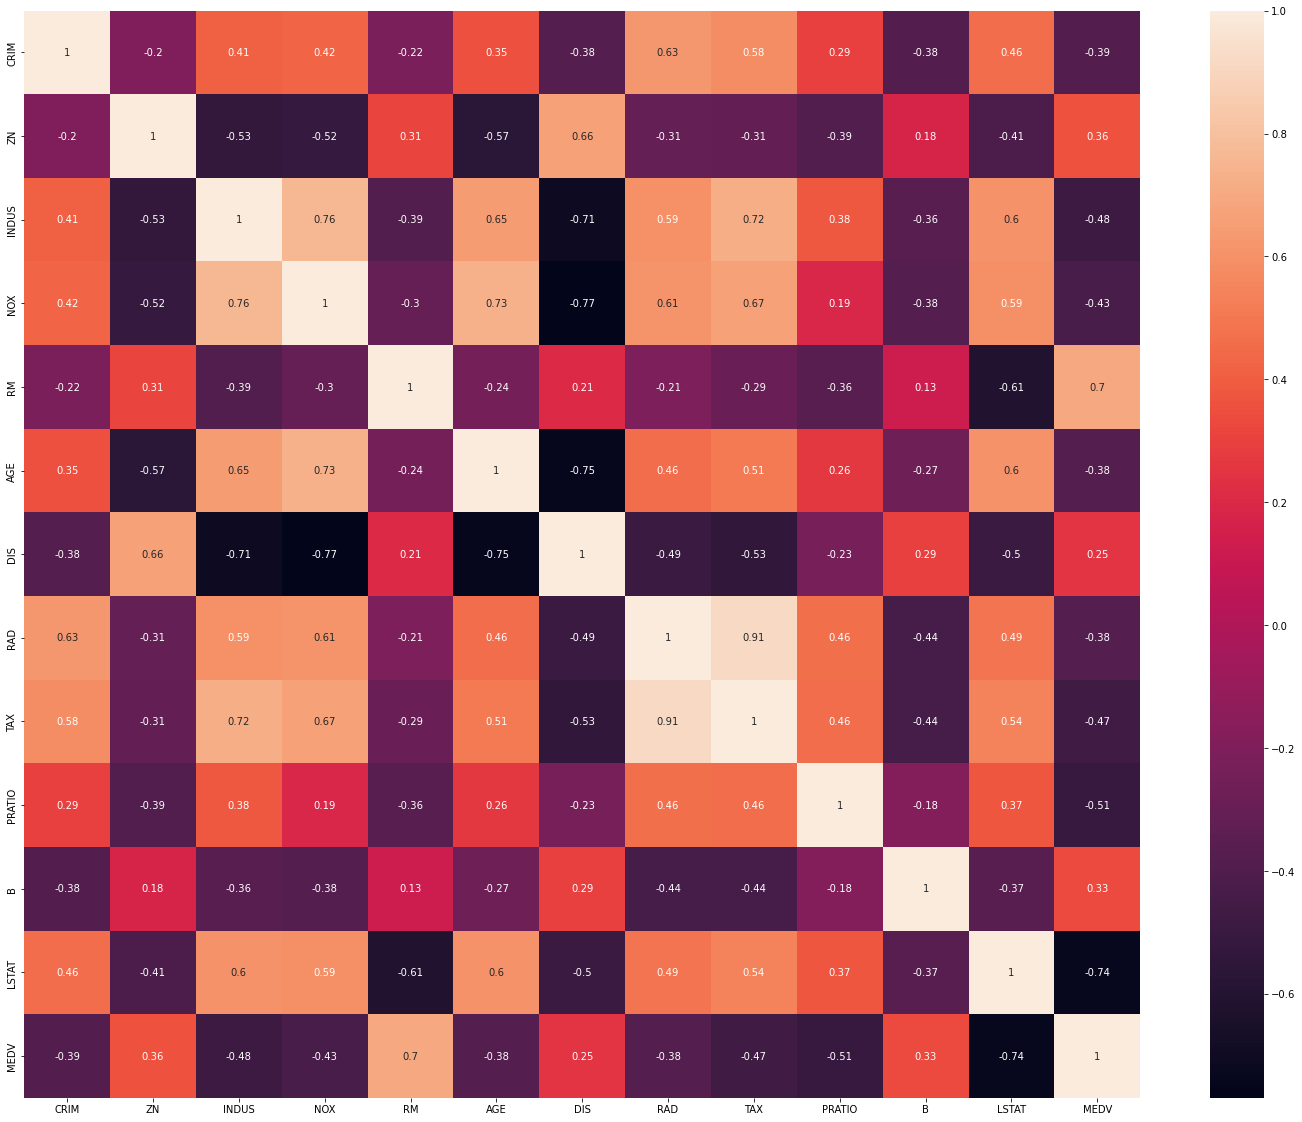

In [116]:
plt.figure(figsize=(25,20))
sns.heatmap(datos.drop("CHAS",axis=1).corr(),annot= True)

En ete primer vistazo podemos centrarnos en las correlacioes mñas fuertes:
En primer caso podemos ver la fuerte correlacón de 

"TAX" vs "RAD"   0.91  
"MEDV" vs "RM" 0.7    
"MEDV" vs "LSTATE" -0.74    

"DIS" vs "INDUS" -0.71   
"NOX vs "DIS" -0.77   
"INDUS" vs "NOX" 0.76    

"DIS" vs "AGE" -0.75   
"AGE" vs "INDUS" 0.65
"AGE" vs "NOX"0.73

A groso modo podemos diferenciar 3 grupos de variables: 

El precio medio que depende mucho del número de habitaciones y del tipo de clase social

"TAX" que depende ucho de la distancia , ademas de la cantidad de suelo industrial(que a su vez se relaciona con la contaminación "NOX")

y por último "DIS" que afecta a la cantidad de contaminación/industria presente y la antiguedad de os edificios.

Todas estas relaciones parecen razonables y la posible existencia de relaciones causa-efecto.


Vemos que no tenemos datos nulos en los diferentes campos.

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

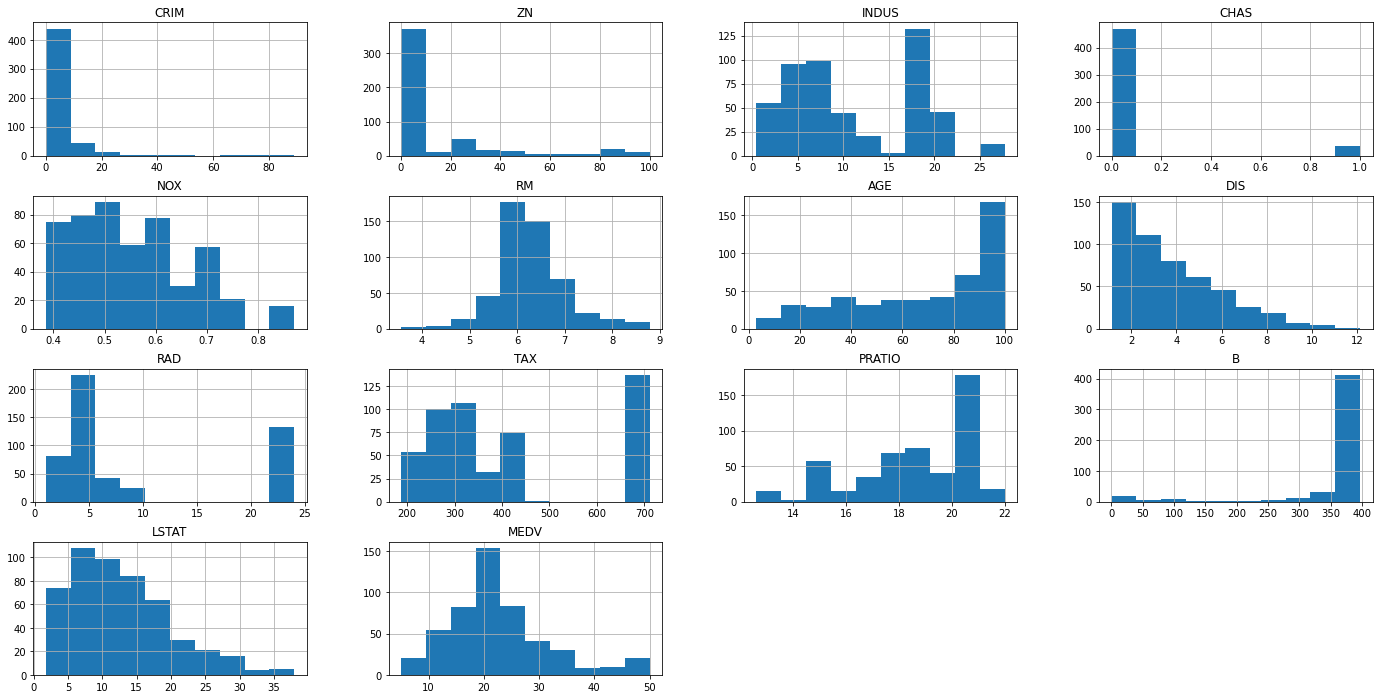

In [117]:
datos.hist(figsize=(24,12))

En esta distribucion podemos apreciar varias cosas.
La variable "CHAS" que nos indica si la propiedad esta en el borde del rio , en realidad lo podriamos usar como un boolean para filtrar datos y nos ionforma de que la mayoria de las propiedades esan en el stado 0 , es decir que no tocan al rio.
#ver influenncia en el precio por tca al rio.#

Observamos que las ariables "RM" y "MEDV" siguen una distribucion parecedida a la normal.En el caso de MEDV vemos cierta anomalia entorno a 50 que al examinar en el scatter plot , nos llama la atención y que parece sugerir que en realidad más que un valor de 50000$ debe ser de >50000$ por la acumulación anormal de puntos.

LSTAT esta muy desplazado a la izquierda. Nos indica el nivel de estudios y laboral de la muestra. Evidentemente no parece seguir  un modelo normal , deberemos intentar ajustarlo a un modelo logaritmico



<AxesSubplot:xlabel='MEDV', ylabel='RM'>

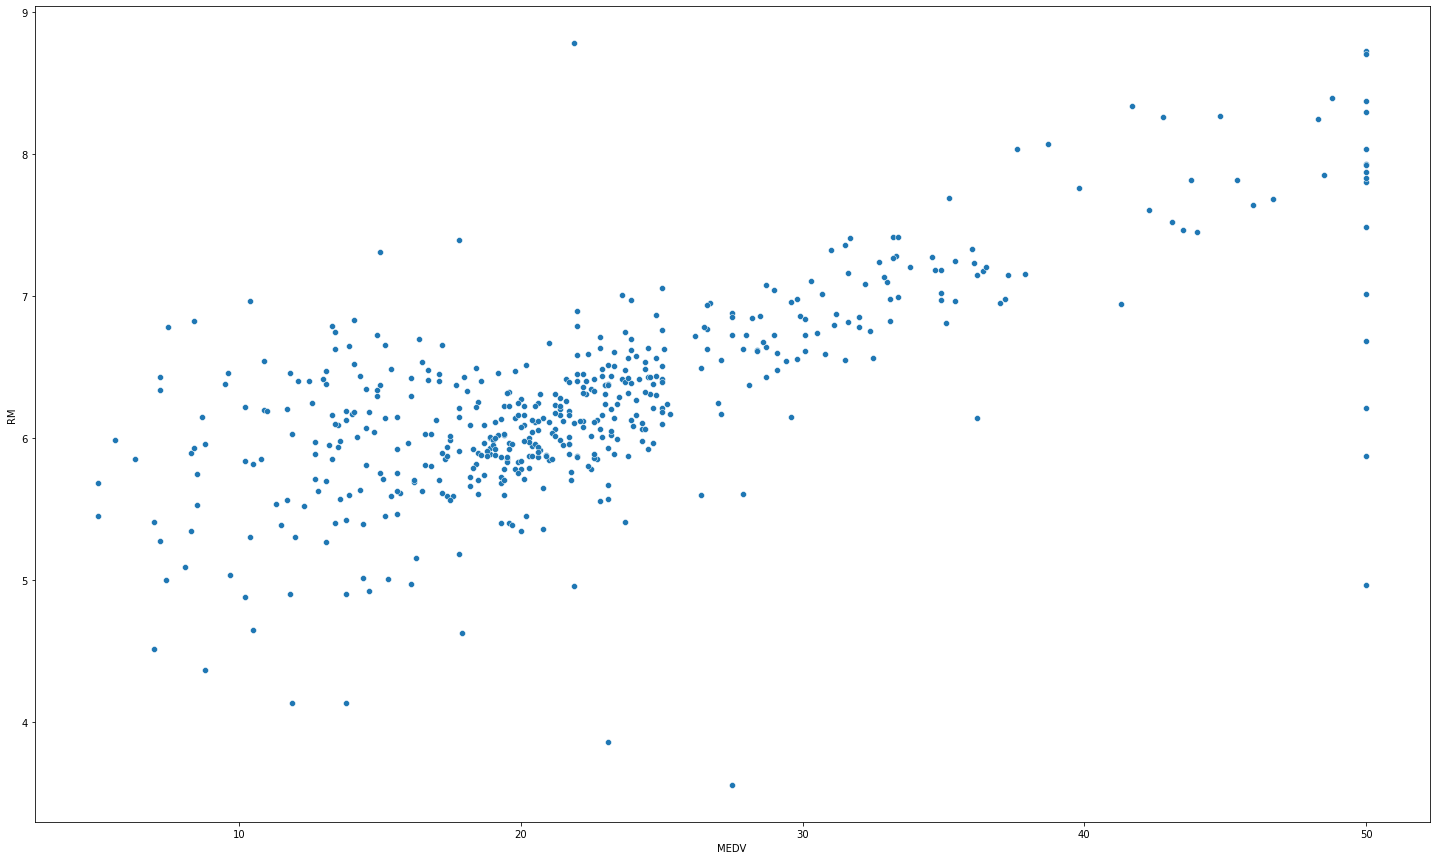

In [118]:
#gráfico de puntos entre RM y MEDV
plt.figure(figsize=(25,15))
sns.scatterplot(data=datos,x="MEDV",y="RM")

Ahora separamos los datos entre _train_ y _test_ en una relación 80:20
Primero escogemos como variable _y_el valor medio "MEDV" y como _x_  al resto del dataset.

In [119]:
from matplotlib.pyplot import axis

y=datos["MEDV"]
x=datos.drop("MEDV",axis=1)


In [120]:
y.head()

0    21.6
1    34.7
2    33.4
3    36.2
4    28.7
Name: MEDV, dtype: float64

In [121]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21


In [122]:
from sklearn.linear_model import LinearRegression

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

Procedemos a hacer otra vez una vision global de los datos

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

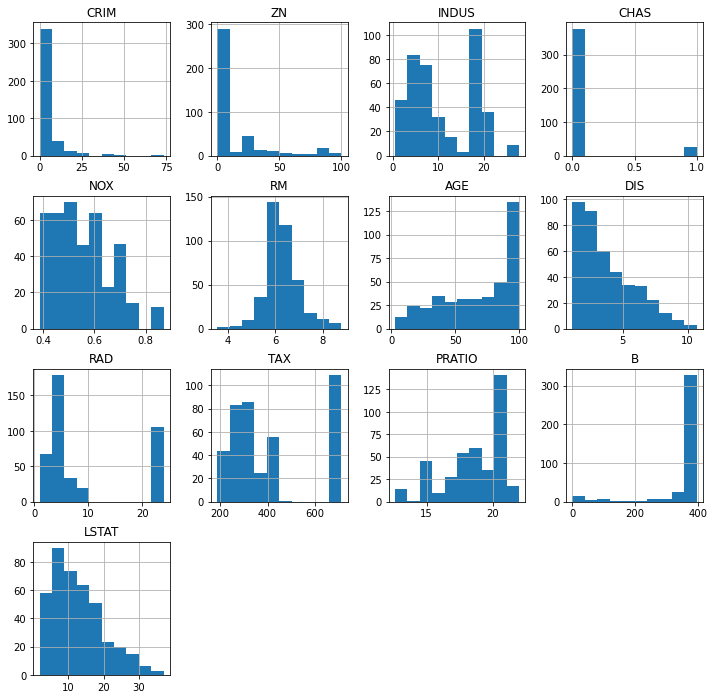

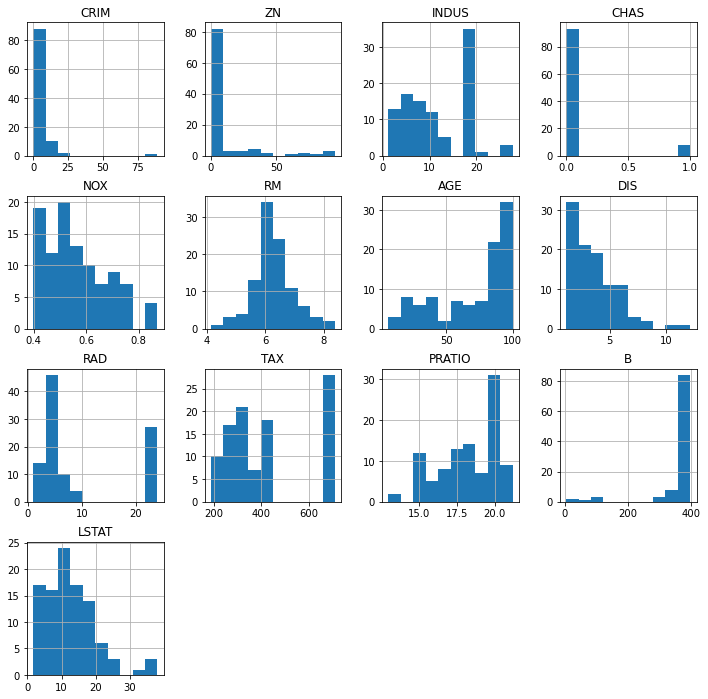

In [125]:
x_train.hist(figsize=(12,12))
x_test.hist(figsize=(12,12))


No se observan diferencias significativas visibles a simple vista.
Procedemos a examinar la variable _y_,"MEDV", mediante un diagrama de caja

<AxesSubplot:ylabel='MEDV'>

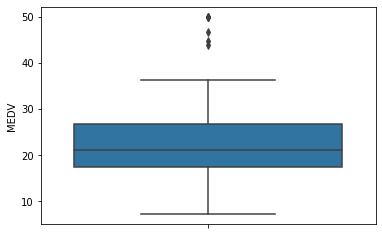

In [126]:
sns.boxplot(y=y_test,data=x_test)

<AxesSubplot:ylabel='MEDV'>

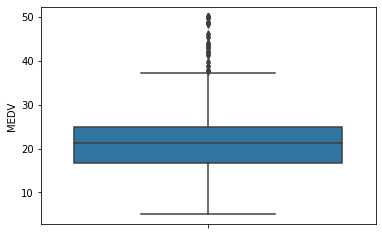

In [127]:
sns.boxplot(y=y_train,data=x_train)

Observamos que en los dos subgrupos la media parece mantenerse en el mismo rango ,salvo la presencia de más outliners y cierta asimetria al estar desplazada la media de la mediana, los dos subconjuntos parece seguir un adistribución normal
Lo comprobando sacando los valores estadísticos.

In [128]:
y_test.describe()

count    101.000000
mean      22.874257
std        9.218857
min        7.200000
25%       17.500000
50%       21.200000
75%       26.700000
max       50.000000
Name: MEDV, dtype: float64

In [129]:
y_train.describe()

count    404.000000
mean      22.443812
std        9.212199
min        5.000000
25%       16.800000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

Efectivamente, lo que intuíamos en los gráficos se confirma, siendo los valores de la media y la std muy similares.
Ahora podemos volver a los datos x y comprobar si nuestras percepciones generales són ciertas.Empezamos viendo si hay relación entre el número  de industrias y el grado de contaminación.
Para ello empezamos revisando gráficamente los datos:

<AxesSubplot:xlabel='INDUS', ylabel='NOX'>

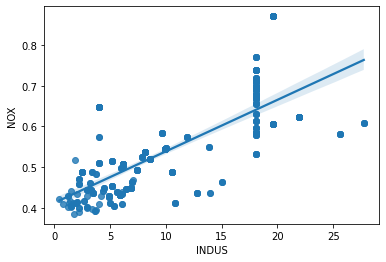

In [130]:
sns.regplot(x=x_train["INDUS"],y=x_train["NOX"])

<AxesSubplot:xlabel='INDUS', ylabel='NOX'>

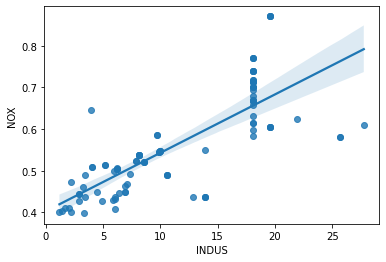

In [131]:
sns.regplot(x=x_test["INDUS"],y=x_test["NOX"])

Comprobamos lo que observamos en el gráfico mediante la correlación de pearson.Establecemos la hipótesis:
Ho: No hay relación entre la contaminación y el suelo industrial
H1: hay relación entre la contaminación y el suelo industrial

In [132]:

scipy.stats.pearsonr(x_test["INDUS"],x_test["NOX"])

(0.773512225541575, 2.533526021137601e-21)

In [133]:
scipy.stats.pearsonr(x_train["INDUS"],x_train["NOX"])

(0.7624209290267374, 5.273188198744803e-78)

En ambos casos obtenemos un valor inferior a 0.05 con lo que se rechaza la H0 y , por lo tanto, existe ralación entre contaminación y suelo industrial. En el gráfico tambien se observa que para el valor 17 existe alguna anomalia .



## Parte 2
Procedemos a crear 2 columnas con transformada log de los datos de LSTAT y a ver si se parecen más a una distribución normal.

In [134]:
log_Lstat=np.log(x_train["LSTAT"])
x_train["LOG_LSTAT"]=log_Lstat

C:\Users\anton\AppData\Local\Temp/ipykernel_17364/3230434866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train["LOG_LSTAT"]=log_Lstat


In [135]:
log_Lstat=np.log(x_test["LSTAT"])
x_test["LOG_LSTAT"]=log_Lstat

C:\Users\anton\AppData\Local\Temp/ipykernel_17364/1878848784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["LOG_LSTAT"]=log_Lstat


In [136]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,LOG_LSTAT
87,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270.0,17.8,396.90,5.50,1.704748
449,6.71772,0.0,18.10,0,0.713,6.749,92.6,2.3236,24,666.0,20.2,0.32,17.44,2.858766
374,19.60910,0.0,18.10,0,0.671,7.313,97.9,1.3163,24,666.0,20.2,396.90,13.44,2.598235
253,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315.0,16.4,392.89,6.57,1.882514
402,24.80170,0.0,18.10,0,0.693,5.349,96.0,1.7028,24,666.0,20.2,396.90,19.77,2.984166


In [137]:
log_nox=np.log(x_train["NOX"])
x_train["LOG_NOX"]=log_nox

C:\Users\anton\AppData\Local\Temp/ipykernel_17364/2619500414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train["LOG_NOX"]=log_nox


## Parte 3
Empezamos con vista general con los nuevos campos.

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'LOG_LSTAT'}>,
        <AxesSubplot:title={'center':'LOG_NOX'}>, <AxesSubplot:>]],
      dtype=object)

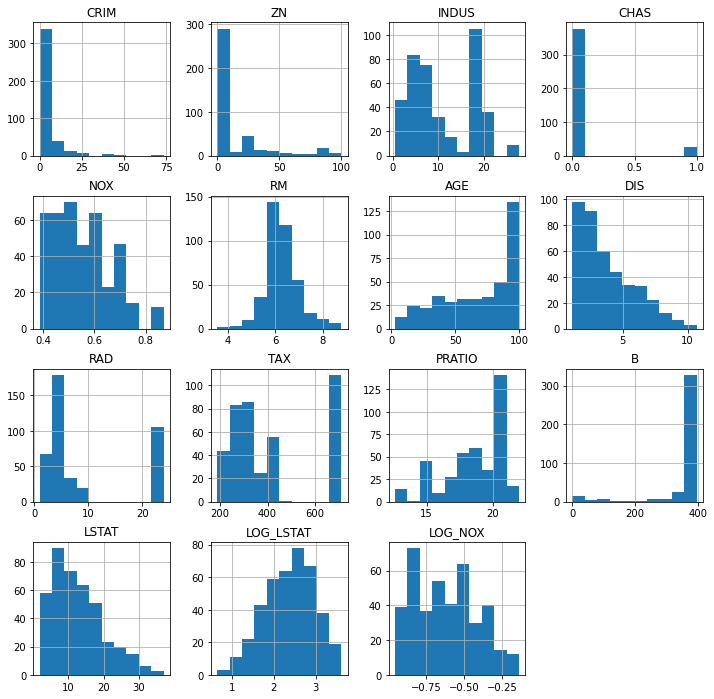

In [138]:
x_train.hist(figsize=(12,12))


A simple vista parece que si , examinamos el campo _"LOG_LSTAT"_ más detenidamente para nuestros 2 subgrupos (_train_ y _test_)

c:\Users\anton\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LOG_LSTAT', ylabel='Density'>

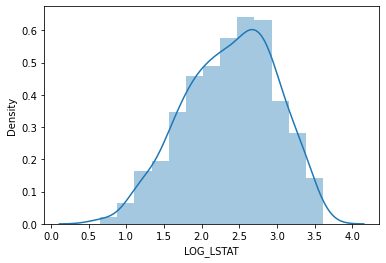

In [139]:
sns.distplot(x_train["LOG_LSTAT"])

c:\Users\anton\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LOG_LSTAT', ylabel='Density'>

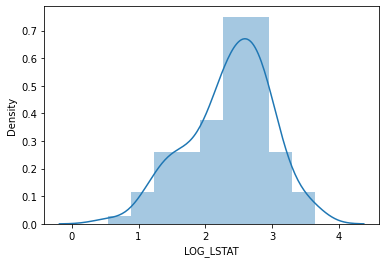

In [140]:
sns.distplot(x_test["LOG_LSTAT"])

Comprobamos ademas con boxplot , lo que ya vemos en el histograma.

c:\Users\anton\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LOG_LSTAT'>

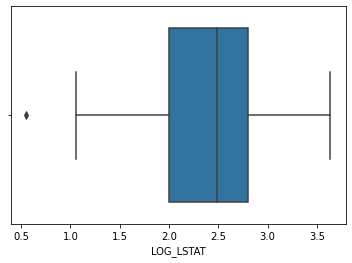

In [141]:
sns.boxplot(x_test["LOG_LSTAT"])

c:\Users\anton\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LOG_LSTAT'>

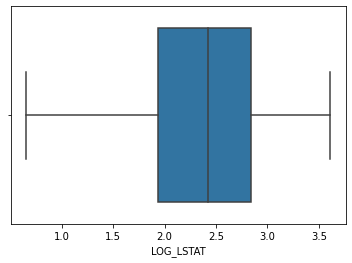

In [142]:
sns.boxplot(x_train["LOG_LSTAT"])

<AxesSubplot:xlabel='LOG_LSTAT', ylabel='MEDV'>

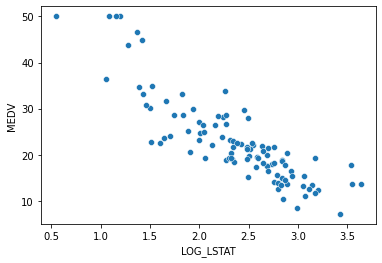

In [143]:
sns.scatterplot(x=x_test["LOG_LSTAT"],y=y_test)

Comprobamos gráficamente si existe una relación lineal entre el campo _log_lstat_ y el precio medio.

<AxesSubplot:xlabel='LOG_LSTAT', ylabel='MEDV'>

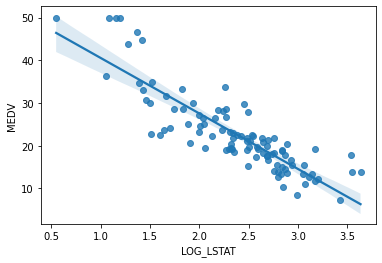

In [144]:
sns.regplot(x=x_test["LOG_LSTAT"],y=y_test)

<AxesSubplot:xlabel='LOG_LSTAT', ylabel='MEDV'>

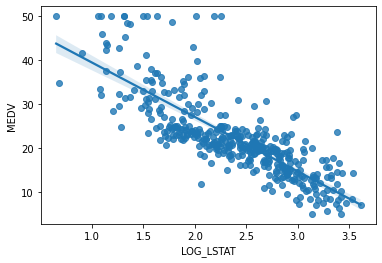

In [145]:
sns.regplot(x=x_train["LOG_LSTAT"],y=y_train)

Vemos que LSTAT si que s eparece ajustar a un modelo logarítmico haciendo que adquiera una distribución más parecida a la normal, y que tiene una relación lineal con MEDV.


Continuamos analizando la variable CHAS , que es un avariable dummy que ya estaba creada en la tabla.

c:\Users\anton\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CHAS', ylabel='Density'>

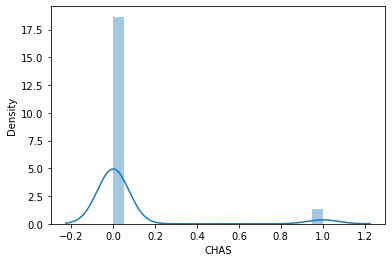

In [146]:
sns.distplot(x_train["CHAS"])

c:\Users\anton\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CHAS', ylabel='Density'>

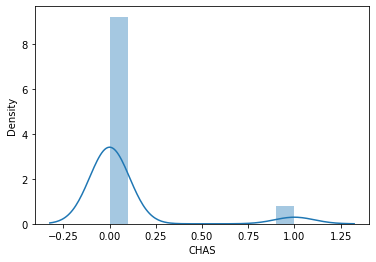

In [147]:
sns.distplot(x_test["CHAS"])

Vemos que como habiamos visto en la vista general de los datos , en el apartado anterior, los valores son similares.Ahora podemos hacer la pregunta de si realmente estar cerca del rio o no afecta al valor de la vivienda.Para ello nos valdremos del test T

Planteamos las hipótesis:    
Ho: u1=u2 estar cerca o no del rio es lo mismo.    
H1: u1!=u2 hay diferencia de estar cerca o no del rio.   

In [148]:
import scipy.stats
scipy.stats.levene(y_train,x_train["CHAS"])


LeveneResult(statistic=388.93146037501924, pvalue=5.957453093980021e-71)

In [149]:
scipy.stats.levene(y_test,x_test["CHAS"])

LeveneResult(statistic=93.18671510361627, pvalue=2.4201882126134793e-18)

In [150]:
scipy.stats.ttest_ind(y_train,x_train["CHAS"])

Ttest_indResult(statistic=48.80552144347303, pvalue=7.047642083186267e-243)

In [151]:
scipy.stats.ttest_ind(y_test,x_test["CHAS"])

Ttest_indResult(statistic=24.839108225287163, pvalue=4.931126749661161e-63)

en los dos casos obtenemos valores de p<0.05 , con lo cual podemos descartar la hipotesis 0 y afirmar que hay una evidencia estadística de que estar cerca del rio tiene una influencia en el precio de las viviendas.